
# Investigate a Dataset - [No Show Appointments for patients -  may/2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    ● 'ScheduledDay' tells us onwhat day the patient set up theirappointment.

    ● 'Neighborhood' indicates thelocation of the hospital.

    ● 'Scholarship' indicateswhether or not the patient isenrolled in Brasilian welfareprogram Bolsa Família.

    ● Be careful about the encodingof the last column: it says 'No' ifthe patient showed up to theirappointment, and 'Yes'
      if they did not show up.


### Question(s) for Analysis
Questions we will try to answer:
+ What is the attendance vs. no-attendance ratio?
+ What is the most important feature of the following (“Age”, “Alcoholism”, “Get an SMS”, “Gender”, “Scholarships”), which helps the patient?

In [1]:
# Use this cell to set up import statements for all of the packages that you
# Use this cell to set up import statements for all of the packages that you

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this part of the research, we will load the data, check for cleanliness, and then trim and clean the data for analysis.


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head() # Show 5 rows from data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Exploring the dimension of data
print(df.shape) 

(110527, 14)


Result (rows & columns)

In [5]:
# Explore whether there is duplicate data or not
print(df.duplicated().sum()) 

0


If the result = 0, then there is no duplication in data

In [6]:
# Exploring whether there is null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

If the result = 0, then there is no null value in data

### Exploring Data that need to be cleaned

In [7]:
# Exploring number of unique values for patients
print(df['PatientId'].nunique())

62299


If the result != 0, there are patients who have more than one appointment

In [8]:
# Explore how many data are duplicated in PatientId
print(df['PatientId'].duplicated().sum())

48228


In [9]:
# Exploring status of No-show for duplicate Patients
print(df.duplicated(['PatientId', 'No-show']).sum())

38710


If the result != 0, there are patients have same status and it need to clean

In [10]:
# Explore summary for the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the previous data, we explore that the mean of Age = 37 and max Age = 115 and min Age = -1 ( There may be an error in the data and it does not affect the analysis of the data), about 25% receive a message majorty don't have chronic disease and the average Age of 50% ranges from 18 to 55.

In [11]:
# Find out what is the wrong age
mis_age = df.query('Age == -1')
mis_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# Exploring the info of the data (data types, null values etc..)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
At this stage, we will delete the wrong data that affects the results of the analysis and also delete the unimportant data.

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# solve problem 1 : drop the Age which equal -1 label mis_age and index 99832
df.drop(index = 99832 , inplace = True)

In [14]:
# Explore summary for New data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


min Age equal zero

In [15]:
# Exploring New dimension of data
print(df.shape) 

(110526, 14)


numder of rows must equal 110526 ( 110527 - 1 )

In [16]:
# solve problem 2 : drop patients which have same status of showing
df.drop_duplicates(['PatientId', 'No-show'] , inplace = True)

In [17]:
# Exploring the dimension of data
print(df.shape)  

(71816, 14)


numder of rows must equal 71816 ( 110526 - 38710 )

In [18]:
# Delete unimportant data columns in the analysis
df.drop(['PatientId', 'ScheduledDay','AppointmentDay','AppointmentID'] , axis = 1, inplace = True)

In [19]:
# Fix typos in data column names
df.rename(columns = {'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap',
                     'No-show':'No_show'}, inplace = True)

In [20]:
# Load New data
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

After we've cleaned up the data, you're ready to move on to exploration, such as calculating statistics and graphics to address the research questions you asked in the Introduction section.

### Discover the graph

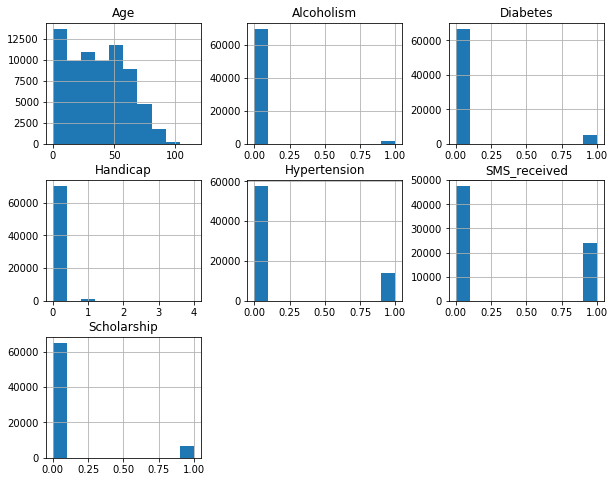

In [21]:
df.hist(figsize=(10,8));

### Make a graph to explore the relationship between elements
 (age, alcoholics, SMS receptors, gender, scholarship) and people who came to their appointment

### Research Question 1 (What is the registration vs. no-show rate?)

In [22]:
# The patient section is divided into two parts (show, no show)
patient_show = df.No_show == 'No'
patient_no_show = df.No_show == 'Yes'

pd.DataFrame([df[patient_show].count(), df[patient_no_show].count()], index= ['show', 'no show'])

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
show,54153,54153,54153,54153,54153,54153,54153,54153,54153,54153
no show,17663,17663,17663,17663,17663,17663,17663,17663,17663,17663


From the previous results, we conclude that the percentage of patients who saw a message is 3 times greater than the percentage of those who did not see it.

In [23]:
# calculate mean
pd.DataFrame([df[patient_show].mean(), df[patient_no_show].mean()], index= ['show', 'no show'])

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
show,37.229166,0.091334,0.202944,0.072868,0.02360,0.020904,0.297232
no show,34.376267,0.108419,0.170922,0.065108,0.02944,0.017777,0.453094


From the previous results, the average age of people who show = 37 up and people who didn't = 34

In [24]:
# Creating plot by ising fuction to make it easy
def attendance_rating (col_name):
    fig = plt.figure(figsize =(15, 5)) # Size of figure
    df[col_name][patient_show].hist(alpha=0.6, bins=20, color='black', label= 'Show')
    df[col_name][patient_no_show].hist(alpha=0.6, bins=20, color='red', label= 'No show')

    # show plot
    plt.ylabel("Num of Patient")
    plt.xlabel(f"{col_name}")
    plt.title("{} vs. audience".format(col_name))
    plt.legend()

### Research Question 2 (Does age affect attendance rate?)

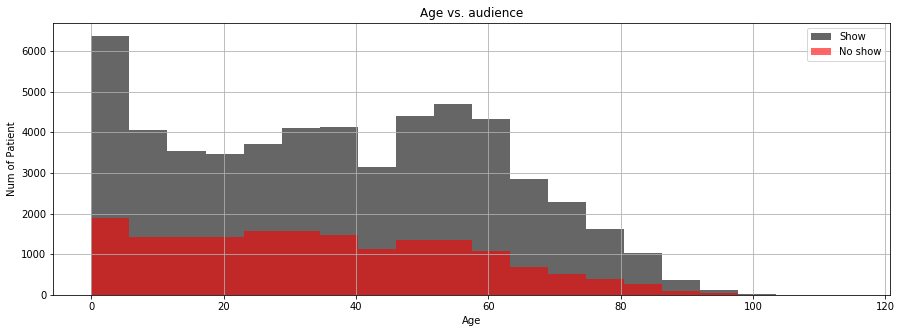

In [25]:
attendance_rating ('Age')

From the age of 0 to 8, most of the ages see messages (because of the parents' interest), and the interest in messages decreases with increasing age.

### Research Question 3 (Does Gender affect attendance rate?)

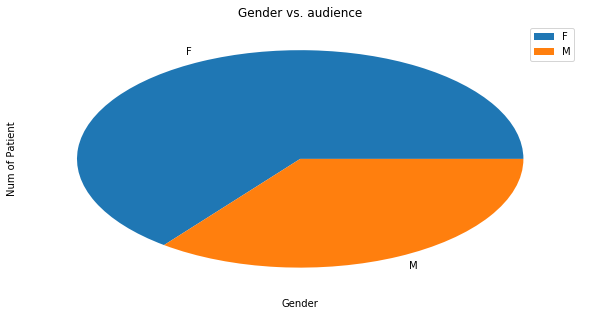

In [26]:
#In this case we will use patient_show
# Creating plot
fig = plt.figure(figsize =(10, 5)) # Size of figure
df['Gender'][patient_show].value_counts().plot(kind='pie')

# show plot
plt.ylabel("Num of Patient")
plt.xlabel("Gender")
plt.title("Gender vs. audience")
plt.legend()

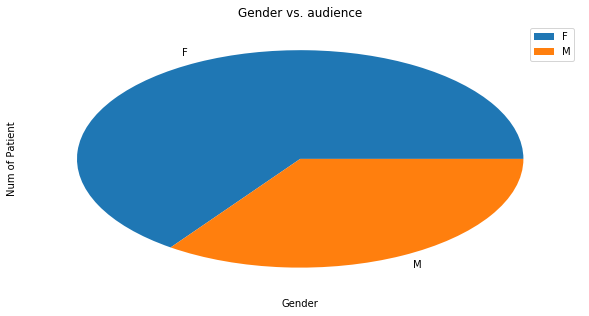

In [27]:
#In this case we will use patient_no_show
# Creating plot
fig = plt.figure(figsize =(10, 5)) # Size of figure
df['Gender'][patient_no_show].value_counts().plot(kind='pie')

# show plot
plt.ylabel("Num of Patient")
plt.xlabel("Gender")
plt.title("Gender vs. audience")
plt.legend()

### Research Question 4 (Does Genedr affect attendance rate in addition to the effect of age?)

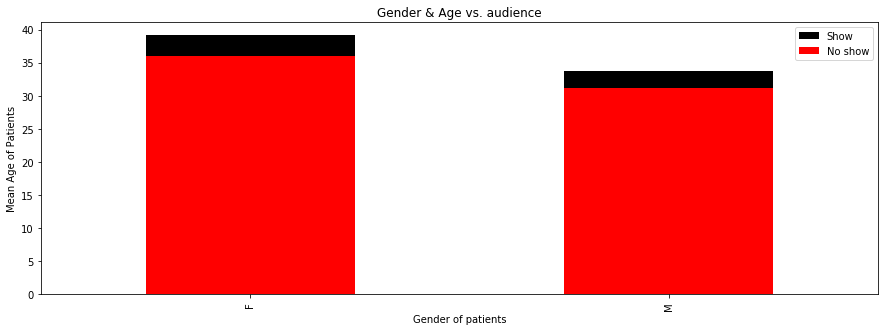

In [28]:
# using group by function to find relations between elements

# Creating plot
fig = plt.figure(figsize =(15, 5)) # Size of figure
df[patient_show].groupby(['Gender']).Age.mean().plot(kind='bar', color='black', label= 'Show')
df[patient_no_show].groupby(['Gender']).Age.mean().plot(kind='bar', color='red', label= 'No show')

# show plot
plt.ylabel("Mean Age of Patients")
plt.xlabel("Gender of patients")
plt.title("Gender & Age vs. audience")
plt.legend()

In [29]:
# To confirm the previous drawing, let's check with numbers

gender_show = df[patient_show].groupby(['Gender']).Age.mean()
gender_no_show = df[patient_no_show].groupby(['Gender']).Age.mean()
pd.DataFrame([gender_show , gender_no_show], index= ['show', 'no show'])

Gender,F,M
show,39.130292,33.766269
no show,36.065010,31.220400


From the previous two figures, we conclude that gender does not affect the attendance rate, but the percentage of sick women is higher than men

### Research Question 5 (Does Hypertension and diabetes - a chronic disease - affect attendance rate in addition to the effect of age?)

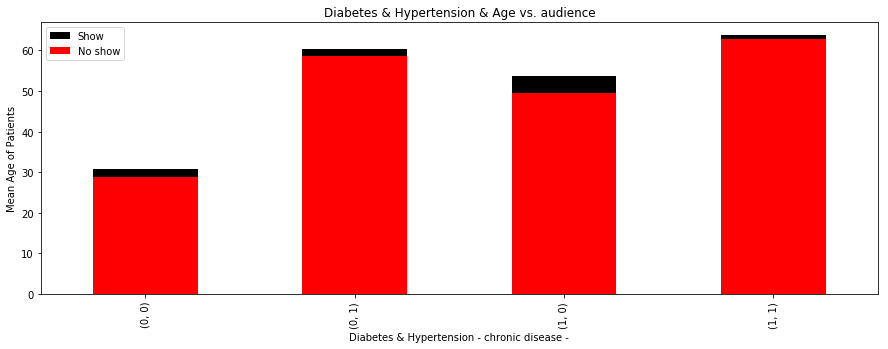

In [30]:
# using group by function to find relations between elements

# Creating plot
fig = plt.figure(figsize =(15, 5)) # Size of figure
df[patient_show].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', color='black', label= 'Show')
df[patient_no_show].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', color='red', label= 'No show')

# show plot
plt.ylabel("Mean Age of Patients")
plt.xlabel("Diabetes & Hypertension - chronic disease -")
plt.title("Diabetes & Hypertension & Age vs. audience")
plt.legend()

(0,0) There is no Diabetes & no Hypertension and their attendance rate is weak and mean age = 30
(0,1) There is no Diabetes & have Hypertension  and their attendance rate is weak and mean age = 55
(1,0) There is have Diabetes & no Hypertension and their attendance rate is weak and mean age = 50
(1,1) There is Hypertension & Diabetes and  their attendance rate is weak and mean age = 60

In [31]:
# To confirm the previous drawing, let's check with numbers

print(df[patient_show].groupby(['Diabetes','Hypertension']).mean()['Age'])
print('-------------------------------------------------------------------')
print(df[patient_no_show].groupby(['Diabetes','Hypertension']).mean()['Age'])

Diabetes  Hypertension
0         0               30.713360
          1               60.270517
1         0               53.701370
          1               63.764303
Name: Age, dtype: float64
-------------------------------------------------------------------
Diabetes  Hypertension
0         0               28.768691
          1               58.650380
1         0               49.481172
          1               62.913282
Name: Age, dtype: float64


#### From the previous results, we conclude that the presence of the disease or not does not affect the attendance rate

### Research Question 6 (Does the message reception rate affect the attendance rate?)

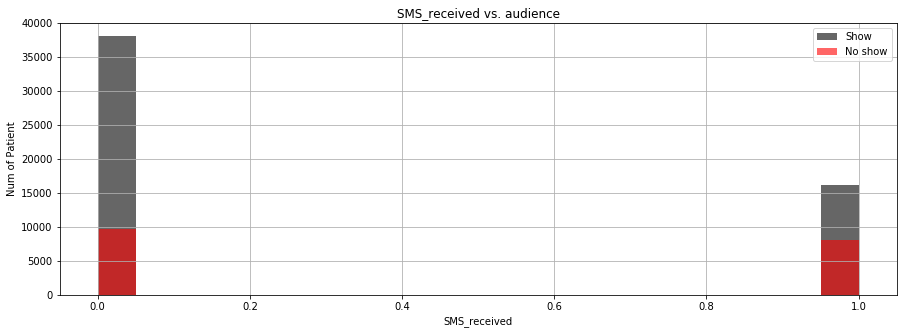

In [32]:
attendance_rating ('SMS_received')

From the previous figure, we conclude that the number of patients receiving the message is more than the non-recipients, and also the percentage of patients present without receiving a message is more than the presence of patients who received the message, and this is strange.

In [33]:
# Creating plot by ising fuction to make it easy
def attendance_value (col_name):
    fig = plt.figure(figsize =(15, 5)) # Size of figure
    df[col_name][patient_show].value_counts().plot(kind = 'bar', color='black', label= 'Show')
    df[col_name][patient_no_show].value_counts().plot(kind = 'bar', color='red', label= 'No show')

    # show plot
    plt.ylabel("Num of Patient")
    plt.xlabel(f"{col_name}")
    plt.title("{} vs. audience".format(col_name))
    plt.legend()

### Research Question 7 (Does the patient's location affect attendance?)

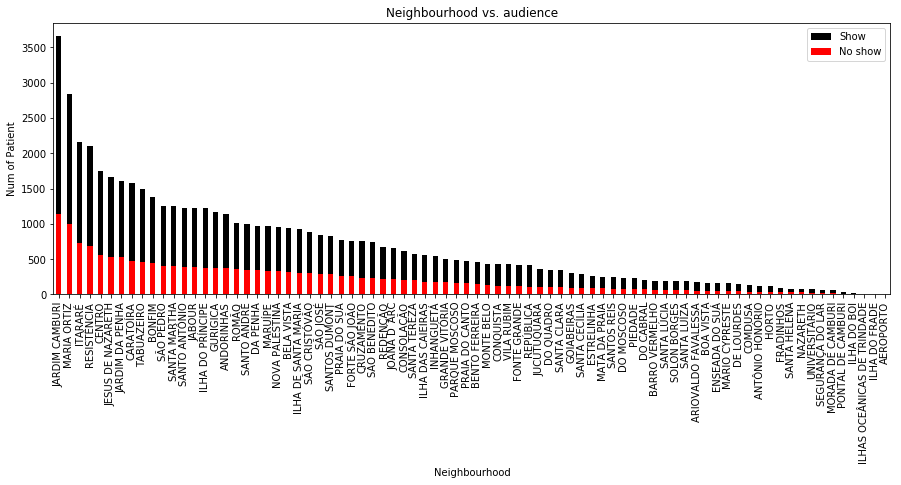

In [34]:
attendance_value ('Neighbourhood')

From the previous results, we conclude that the Neighbourhood has a direct effect on the attendance of patients

### Research Question 8 (Does the patient's average age and location affect his attendance?)

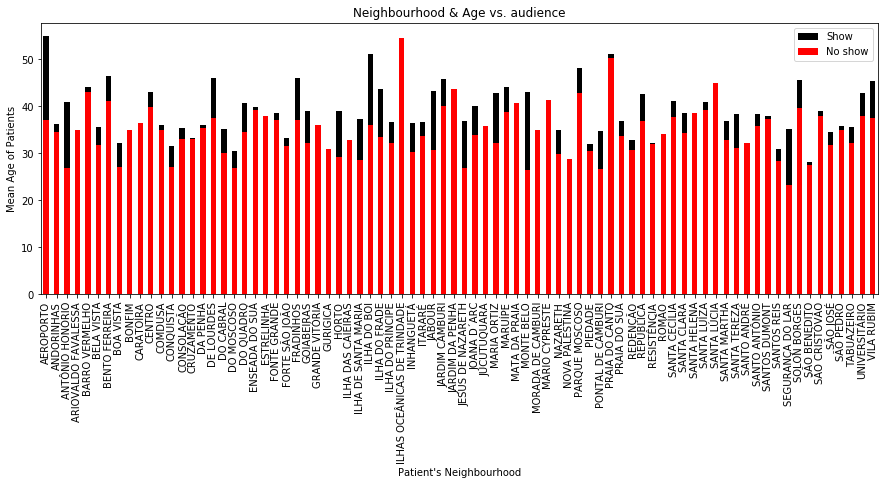

In [35]:
# using group by function to find relations between elements

# Creating plot
fig = plt.figure(figsize =(15, 5)) # Size of figure
df[patient_show].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='black', label= 'Show')
df[patient_no_show].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='red', label= 'No show')

# show plot
plt.ylabel("Mean Age of Patients")
plt.xlabel("Patient's Neighbourhood")
plt.title("Neighbourhood & Age vs. audience")
plt.legend()

From the figure, we conclude that the average age varies from one region to another, and this affects the attendance rate.

### Research Question 9 (Does the patient’s location when receiving the message affect attendance?)

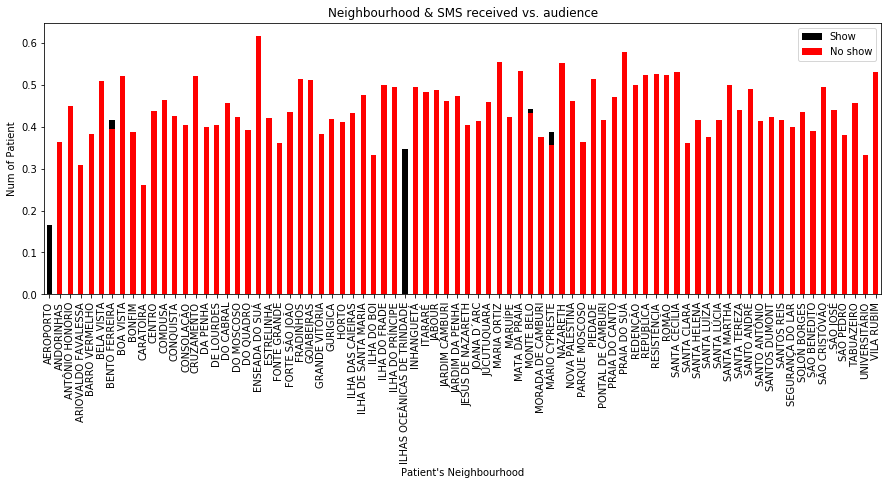

In [36]:
# using group by function to find relations between elements

# Creating plot
fig = plt.figure(figsize =(15, 5)) # Size of figure
df[patient_show].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar', color='black', label= 'Show')
df[patient_no_show].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar', color='red', label= 'No show')

# show plot
plt.ylabel("Num of Patient")
plt.xlabel("Patient's Neighbourhood")
plt.title("Neighbourhood & SMS received vs. audience")
plt.legend()

From the previous result, we conclude that the patient’s location had an effect on delivering the message only in 5 regions.

### Research Question 10 (Does the patient’s Scholarship affect attendance?)

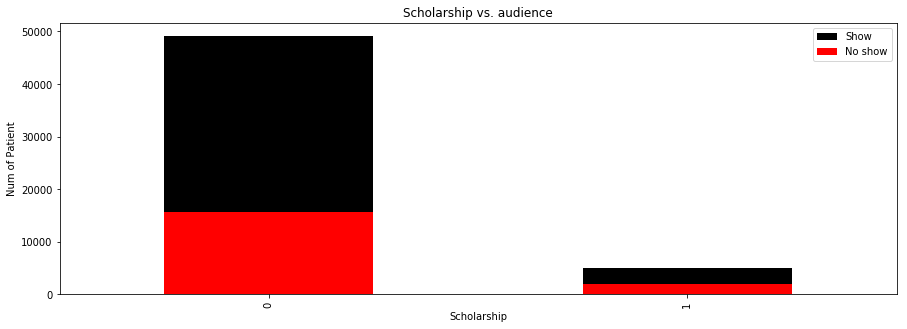

In [37]:
attendance_value ('Scholarship')

In [38]:
# To confirm the previous drawing, let's check with numbers

scholarship_show = df['Scholarship'][patient_show].mean()
scholarship_no_show = df['Scholarship'][patient_no_show].mean()
pd.DataFrame([scholarship_show , scholarship_no_show], index= ['show', 'no show'])

,0
show,0.091334
no show,0.108419


From the previous results, we conclude that the Scholarship don't effect on the attendance of patients

### Research Question 11 (Does the patient’s Alcoholism affect attendance?)

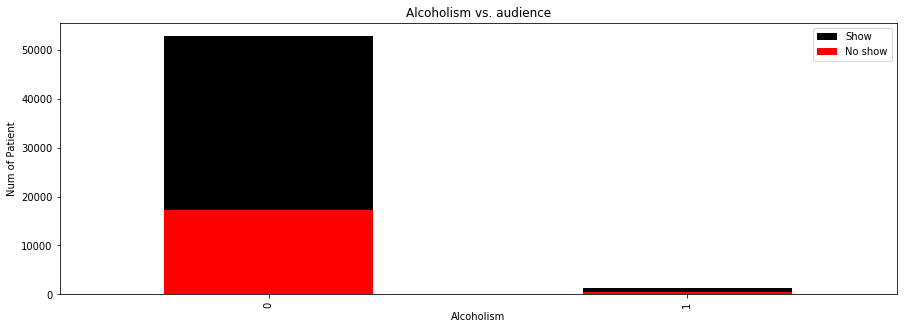

In [39]:
attendance_value ('Alcoholism')

From the previous results, we conclude that the Alcoholism don't effect on the attendance of patients

<a id='conclusions'></a>
## Conclusions

• In conclusion, we conclude that sending the message does not significantly affect the patient's attendance.

• But the patient's location greatly affects the percentage of his attendance with the arrival of the message.

• The effect of age was evident in a large percentage from the age of 0 to 8 years because of the parents' interest in them, and with increasing age, attendance decreased

• Other characteristics such as sex or alcohol are not considered factors affecting whether a person attends or not!"Tips" like this one so that the presentation is as polished as possible.


## Limitations

Among the missing information is the functional status of the patient, which will greatly affect the attendance rate, and there are also many characteristics that had no clear effect.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0